In [1]:
import pandas as pd
from pandas.plotting import parallel_coordinates

import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.feature_selection import r_regression as pearson_corr

from scipy.stats import spearmanr, kendalltau

plt.style.use('seaborn-dark')
%matplotlib inline

### Data setup

#### Iris data

In [2]:
numerical_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
columns = [
  *numerical_columns,
  "class",
]
iris_df = pd.read_csv('./iris.data', header=None, names=columns)

#### Statistic distributions

In [3]:
normal = lambda x, mean, variance: 1/(variance * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-mean)/variance)**2)

## Data visualisation

### Histograms

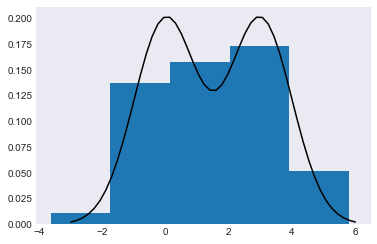

In [4]:
x = np.linspace(-3, 6)
y = (normal(x, 0, 1) + normal(x, 3, 1)) / 2

sample_a = np.random.randn(500) + 3
sample_b = np.random.randn(500)

sample = np.concatenate([sample_a, sample_b])

plt.plot(x, y, c='k')
plt.hist( sample, bins=5, density=True)
plt.show()

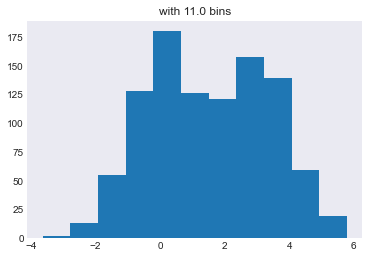

In [5]:
k = np.ceil(np.log2(len(sample)) + 1)

plt.hist(sample, bins=int(k))
plt.title(f"with {k} bins")
plt.show()

bins based on the lenght of the sample

$ k = \left\lceil \frac{max_i(x_i) - min_i(x_i)}{h} \right\rceil $

with $h$ as 

$ h = \frac{3.5 \cdot s}{\sqrt[3]{n}} $

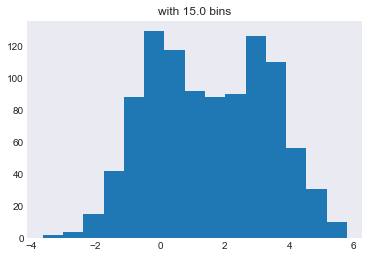

In [6]:
h = (3.5 * sample.std()) / np.cbrt(len(sample))
k = np.ceil((sample.max() - sample.min()) / h)

plt.hist(sample, bins=int(k))
plt.title(f"with {k} bins")
plt.show()

### Boxplot

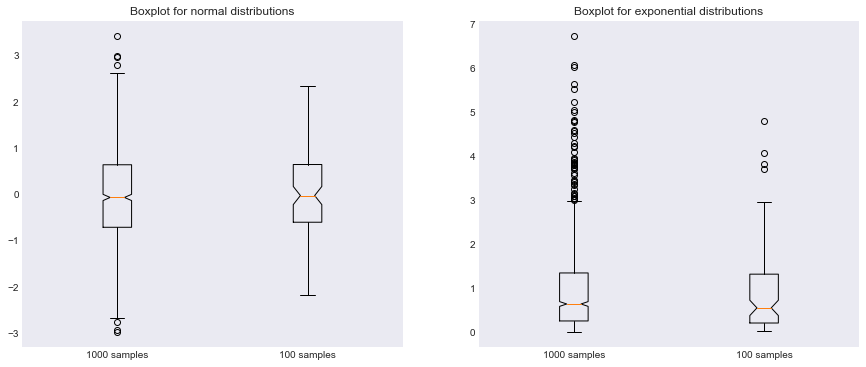

In [7]:
sample_a = np.random.randn(1000)
sample_b = np.random.randn(100)
sample_c = np.random.exponential(1, size=1000)
sample_d = np.random.exponential(1, size=100)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 6)

ax[0].boxplot([sample_a, sample_b], labels=["1000 samples", "100 samples"], notch=True)
ax[0].set_title("Boxplot for normal distributions")

ax[1].boxplot([sample_c, sample_d], labels=["1000 samples", "100 samples"], notch=True)
ax[1].set_title("Boxplot for exponential distributions")

plt.show()

### Scatter plot

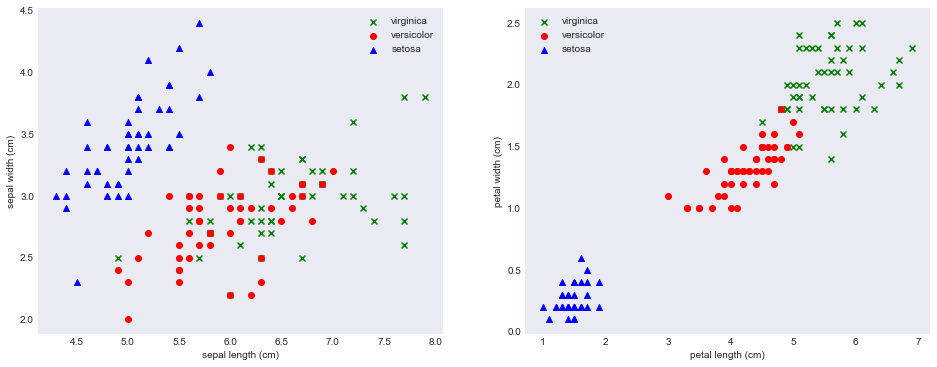

In [8]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16, 6)

viginica_df = iris_df[iris_df['class'].str.contains('virginica')]
versicolor_df = iris_df[iris_df['class'].str.contains('versicolor')]
setosa_df = iris_df[iris_df['class'].str.contains('setosa')]

ax[0].scatter(viginica_df['sepal length (cm)'], viginica_df['sepal width (cm)'], color='g', marker='x')
ax[0].scatter(versicolor_df['sepal length (cm)'], versicolor_df['sepal width (cm)'], color='r', marker='o')
ax[0].scatter(setosa_df['sepal length (cm)'], setosa_df['sepal width (cm)'], color='b', marker='^')
ax[0].legend(['virginica', 'versicolor', 'setosa'])
ax[0].set_xlabel('sepal length (cm)')
ax[0].set_ylabel('sepal width (cm)')

ax[1].scatter(viginica_df['petal length (cm)'], viginica_df['petal width (cm)'], color='g', marker='x')
ax[1].scatter(versicolor_df['petal length (cm)'], versicolor_df['petal width (cm)'], color='r', marker='o')
ax[1].scatter(setosa_df['petal length (cm)'], setosa_df['petal width (cm)'], color='b', marker='^')
ax[1].legend(['virginica', 'versicolor', 'setosa'])
ax[1].set_xlabel('petal length (cm)')
ax[1].set_ylabel('petal width (cm)')

plt.show()

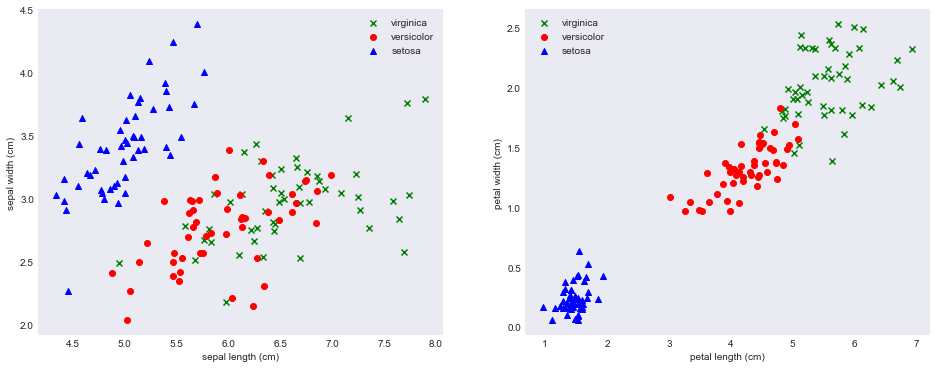

In [9]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16, 6)
numeric_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

noisy_df = iris_df.copy()
noisy_df[numeric_columns] = iris_df[numeric_columns] + np.random.rand(150,4) * 0.1 - 0.05
viginica_df = noisy_df[noisy_df['class'].str.contains('virginica')]
versicolor_df = noisy_df[noisy_df['class'].str.contains('versicolor')]
setosa_df = noisy_df[noisy_df['class'].str.contains('setosa')]

ax[0].scatter(viginica_df['sepal length (cm)'], viginica_df['sepal width (cm)'], color='g', marker='x')
ax[0].scatter(versicolor_df['sepal length (cm)'], versicolor_df['sepal width (cm)'], color='r', marker='o')
ax[0].scatter(setosa_df['sepal length (cm)'], setosa_df['sepal width (cm)'], color='b', marker='^')
ax[0].legend(['virginica', 'versicolor', 'setosa'])
ax[0].set_xlabel('sepal length (cm)')
ax[0].set_ylabel('sepal width (cm)')

ax[1].scatter(viginica_df['petal length (cm)'], viginica_df['petal width (cm)'], color='g', marker='x')
ax[1].scatter(versicolor_df['petal length (cm)'], versicolor_df['petal width (cm)'], color='r', marker='o')
ax[1].scatter(setosa_df['petal length (cm)'], setosa_df['petal width (cm)'], color='b', marker='^')
ax[1].legend(['virginica', 'versicolor', 'setosa'])
ax[1].set_xlabel('petal length (cm)')
ax[1].set_ylabel('petal width (cm)')

plt.show()

### Heatmaps/density plots

In [10]:
x = np.random.randn(1000000)
y = np.random.exponential(0.3, 1000000)
x.shape, y.shape

((1000000,), (1000000,))

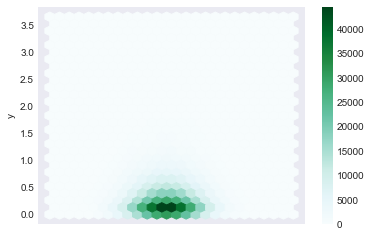

In [11]:
data_df = pd.DataFrame({'x': x, 'y': y})
data_df.plot.hexbin('x', 'y', gridsize=25)
plt.show()

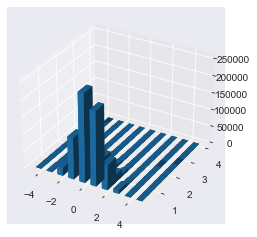

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(x, y)

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

## Higher-dimentional data

### PCA

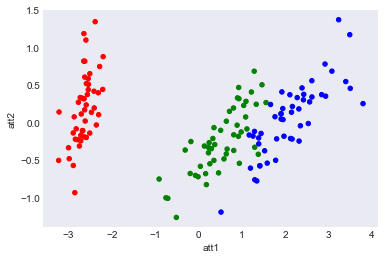

In [13]:
iris_pca = PCA(n_components=2)
iris_pca.fit(iris_df[numeric_columns])

iris_reduced_df = pd.DataFrame(iris_pca.fit_transform(iris_df[numeric_columns]), columns=['att1', 'att2'])
iris_reduced_df['color'] = (
  iris_df.loc[:, 'class']
  .map({
    'Iris-setosa': 'r', 
    'Iris-versicolor': 'g',
    'Iris-virginica': 'b'
  })
)
iris_reduced_df.plot.scatter('att1', 'att2', c='color')
plt.show()

### MDS (Multidimensional scaling)

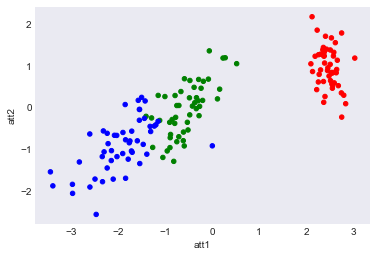

In [23]:
iris_mds = MDS(n_components=2)
iris_mds.fit(iris_df[numeric_columns])

iris_reduced_df = pd.DataFrame(iris_mds.fit_transform(iris_df[numeric_columns]), columns=['att1', 'att2'])
iris_reduced_df['color'] = (
  iris_df.loc[:, 'class']
  .map({
    'Iris-setosa': 'r', 
    'Iris-versicolor': 'g',
    'Iris-virginica': 'b'
  })
)
iris_reduced_df.plot.scatter('att1', 'att2', c='color')
plt.show()

### t-SNE

/Users/juangama/.venv_envs/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/juangama/.venv_envs/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


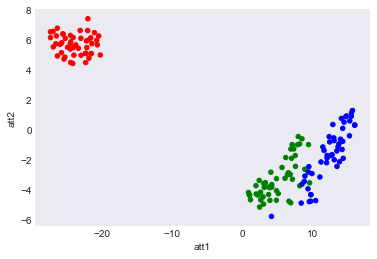

In [27]:
iris_tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
iris_tsne.fit(iris_df[numeric_columns])

iris_reduced_df = pd.DataFrame(iris_tsne.fit_transform(iris_df[numeric_columns]), columns=['att1', 'att2'])
iris_reduced_df['color'] = (
  iris_df.loc[:, 'class']
  .map({
    'Iris-setosa': 'r', 
    'Iris-versicolor': 'g',
    'Iris-virginica': 'b'
  })
)
iris_reduced_df.plot.scatter('att1', 'att2', c='color')
plt.show()

### Parallel Cooordinates plot

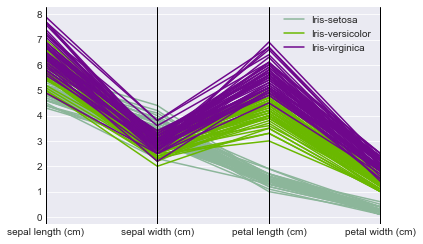

In [18]:
parallel_coordinates(iris_df, 'class')
plt.show()

## Correlaton Analysis 

### Pearson's Correlation coeficient

In [19]:
iris_norm_df = (iris_df[numerical_columns] - iris_df[numerical_columns].mean()) / iris_df[numerical_columns].std()
(iris_norm_df.T @ iris_norm_df) / (len(iris_norm_df) - 1)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


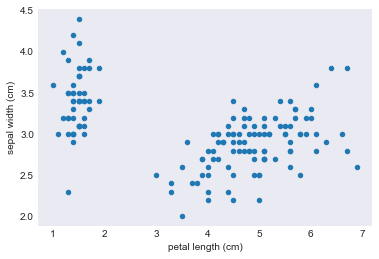

In [20]:
iris_df.plot.scatter('petal length (cm)', 'sepal width (cm)')
plt.show()

### Spearman's rank correlation

$$ \rho = 1-\frac{6 \dot \sum^n_{i=1} (r(x_i) - r(y_i))^2 }{n(n^2-1)} $$

Spearman's rho measures the sum of quadratic distances of ranks and scales this measure to the interval $[-1, 1]$. When the rankings of the $x$ and $y$ values are axacgly in the same order. Spearman's rho will yield the value $1$; if they are in reverse order wee will obtain the value $-1$

In [21]:
corr, _ = spearmanr(iris_df[numerical_columns])
pd.DataFrame(corr, columns=numerical_columns, index=numerical_columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.159457,0.881386,0.834421
sepal width (cm),-0.159457,1.000000,-0.303421,-0.277511
petal length (cm),0.881386,-0.303421,1.000000,0.936003
petal width (cm),0.834421,-0.277511,0.936003,1.000000


### Kendall's tau

In [30]:
iris_kendalltau = pd.DataFrame(np.zeros((4,4)), columns=numeric_columns, index=numeric_columns)
for c1 in numeric_columns:
  for c2 in numeric_columns:
    corr, _ = kendalltau(iris_df[c1], iris_df[c2])
    iris_kendalltau.loc[c1, c2] = corr
iris_kendalltau

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.072112,0.717624,0.654960
sepal width (cm),-0.072112,1.000000,-0.182391,-0.146988
petal length (cm),0.717624,-0.182391,1.000000,0.803014
petal width (cm),0.654960,-0.146988,0.803014,1.000000
